# Nelinearne jednadžbe

----

__Problem:__ nađimo nul-točke funkcije $f(x)$ na zatvorenom intervalu $[a,b]$, odnosno, riješimo jednadžbu

$$
f(x)=0, \quad x\in[a,b]. \tag{1}
$$

Vrijedi sljedeće:

> Ako je $f$ __neprekidna__ na $[a,b]$ i ako je $f(a)f(b)<0$, tada postoji barem jedna točka $\xi\in(a,b)$ takva da je 
>
>$$
f(\xi)=0.
$$
>
>Ako je još i $f'(x)\neq 0$ za $x\in(a,b)$, tada je $\xi$ __jedinstvena__.

Stoga jednadžbu (1) možemo riješiti u dva koraka:

1. Nađemo interval $[a,b]$ u kojem funkcija $f$ ima jedinstvenu nultočku $\xi$,
2. Aproksimiramo točku $\xi$ s unaprijed zadanom točnošću.

Opisat ćemo četiri metode:

1. bisekcija,
2. jednostavna iteracija,
3. Newtonova metoda (metoda tangente) i 
4. metoda sekante.

Sve metode, uz zadanu početnu aproksimaciju $x_0$,  generiraju niz točaka $x_n$ koji, uz određene uvjete, konvergira
prema rješenju $\xi$. 

Metoda ima __red konvergencije__ jednak $r>0$ ako postoji $A>0$ takav da je

$$
|\xi-x_{n+1}|\leq A|\xi-x_n|^r.
$$

__Napomena:__ dokazi tvrdnji se nalaze u knjizi [Numerička matematika, poglavlje 4.1][RS04]. Brojevi primjera se odnose na isto poglavlje.

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

## Bisekcija

Počevši od intervala $[a,b]\equiv [a_0,b_0]$, konstruiramo niz intervala 

$$
[a_0,b_0]\supset [a_1,b_1]\supset [a_2,b_2]\supset [a_3,b_3] \supset \cdots,
$$

gdje je $f(a_n)f(b_n)\leq 0$, i niz točaka

$$
x_{n+1}=\frac{a_n+b_n}{2}.
$$

__Brzina konvergencije__ je __linearna__ jer je 

$$
|\xi-x_{n+1}|\leq \frac{1}{2}|\xi-x_n|,
$$

a __pogreška aproksimacije__ je omeđena s

$$
|\xi-x_{n+1}|\leq \frac{1}{2}|a_n-b_n|.
$$

In [1]:
function mybisection{T}(f::Function,a::T,b::T,ϵ::T)
    fa=f(a)
    fb=f(b)
    x=T
    fx=T
    if fa*fb>zero(T)
        return "Incorrect interval"
    end
    iter=0
    while b-a>ϵ && iter<1000
        x=(b+a)/2.0
        fx=f(x)
        if fa*fx<zero(T)
            b=x
            fb=fx
        else
            a=x
            fa=fx
        end
        iter+=1
        # @show x,fx
    end
    x,fx,iter
end

mybisection (generic function with 1 method)

In [2]:
# Za crtanje koristimo program Gadfly
using Gadfly

### Primjer 4.2

Na slici vidimo da se jedna nul-točka nalazi u intervalu $[-1,0]$, a druga u intervalu $[0,1]$ pa ne treba provjeravati derivaciju.

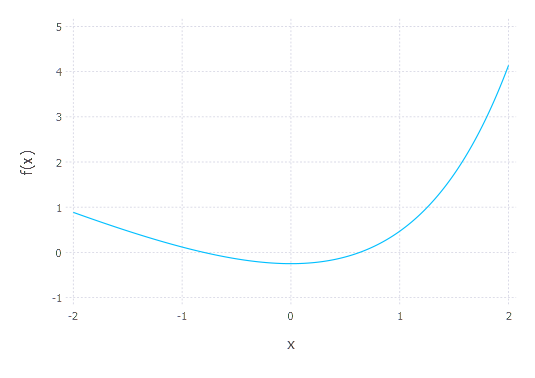

In [3]:
# Primjer 4.2
f(x)=exp(x)-x-5.0/4
plot(f,-2.0,2.0)

In [4]:
mybisection(f,-1.0,0.0,1e-4)

(-0.80120849609375, -5.2241049872669976e-6, 14)

In [5]:
mybisection(f,0.0,1.0,1e-4)

(0.63275146484375, 3.240772329005104e-5, 14)

### Primjer 4.3

Na slici vidimo da se nul-točke nalaze u intervalima

$$
[-1,-0.4],\quad [-0.4,0.2],\quad [0.2,0.6],\quad [0.6,1].
$$

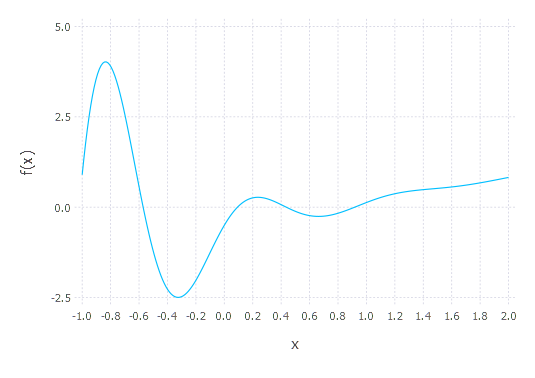

In [6]:
# Primjer 4.3
f(x)=exp(-2x)*sin(6x)+2x/3-1.0/2
plot(f,-1,2, Guide.xticks(ticks=collect(-1:0.2:2)))

In [7]:
mybisection(f,-1.0,-0.4,1e-5), mybisection(f,-0.4,0.2,1e-5), 
mybisection(f,0.2,0.6,1e-5), mybisection(f,0.6,1.0,1e-5)

((-0.5710845947265626, 4.4328553922001745e-5, 16), (0.0925994873046875, 1.2173194170128632e-5, 16), (0.43623657226562496, -9.395485695118388e-6, 16), (0.917742919921875, 1.9683187612029585e-6, 16))


### Primjer 4.4

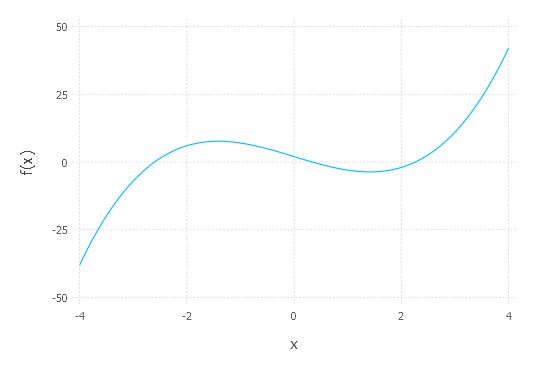

In [8]:
# Primjer 4.4 
f(x)=x^3-6*x+2
plot(f,-4,4)

In [9]:
mybisection(f,-4.0,-2.0,1e-5), mybisection(f,0.0,1.0,1e-5), mybisection(f,1.0,3.0,1e-5)

((-2.6016769409179688, 3.134435505813826e-5, 18), (0.33988189697265625, -2.8325740176082803e-5, 17), (2.2618026733398438, 4.001370053074993e-6, 18))

### Primjer 4.5

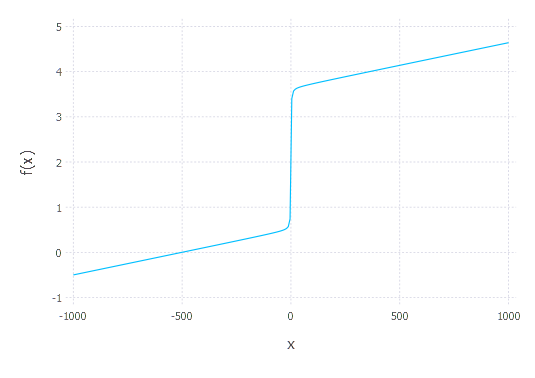

In [10]:
# Primjer 4.5 (a)
f(x)=0.001x+0.5+π/2+atan(x)
plot(f,-1000,1000)

In [11]:
mybisection(f,-600.0,-400.0,1e-3)

(-501.9920349121094, 2.5932851865917428e-8, 18)

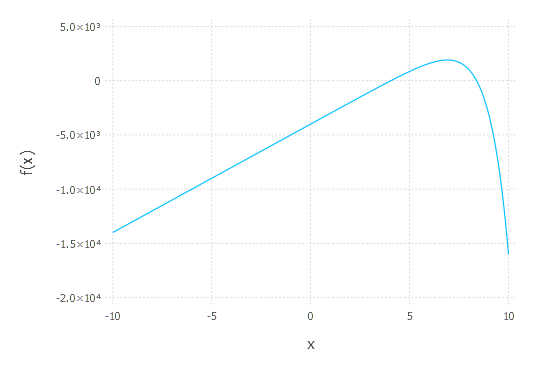

In [12]:
# Primjer 4.5 (b)
f(x)=1000(x-4)-exp(x)
plot(f,-10,10)

In [13]:
mybisection(f,0.0,5.0,1e-8), mybisection(f,5.0,10.0,1e-8)

((4.05784978531301, -2.474680847797117e-6, 29), (8.386223996058106, 1.0124924301635474e-5, 29))

## Jednostavne iteracije

Rješavamo jednadžbu oblika 

$$
x=\varphi(x). \tag{2}
$$

__Teorem o fiksnoj točki (Banach)__
Neka je 

$$\varphi:[a,b]\to \mathbb{R}$$

_neprekidno derivabilna funkcija_ i neka vrijedi

\begin{align*}
\varphi(x) &\in [a,b] \quad  \forall x\in [a,b], \\
|\varphi'(x)|&\leq q<1 \quad \forall x\in(a,b) \tag{3}.
\end{align*}

Tada postoji jedinstvena __fiksna točka__ $\xi \in [a,b]$ za koju vrijedi:

* $\xi=\varphi(\xi)$,
* za proizvoljnu točku  $x_0\in[a,b]$ niz 
$$
x_n=\varphi(x_{n-1}), \quad n=1,2,3,\ldots
$$ 
konvergira prema $\xi$ te vrijede __ocjene pogreške__

\begin{align*}
|\xi-x_n|&\leq \displaystyle\frac{q^n}{1-q}|x_1-x_0|, \\
|\xi-x_n|&\leq \displaystyle\frac{q}{1-q}|x_n-x_{n-1}|, \\
|\xi-x_n|&\leq q|\xi-x_{n-1}|.
\end{align*}

Dakle, konvergencija je __linearna__.

Za dokaz teorema vidi [R. Scitovski, Numerička matematika, str. 73](https://www.mathos.unios.hr/nm/materijali/Num.PDF).

In [15]:
function myiteration{T}(φ::Function,x::T,ϵ::T)
    ξ=φ(x)
    iter=0
    while abs(x-ξ)>ϵ && iter<1000
        x=ξ
        ξ=φ(x)
        iter+=1
    end
    ξ,iter
end

myiteration (generic function with 1 method)

Za korištenje metode iteracije potrebno je 

> transformirati oblik (1) u oblik (2) i to tako da je ispunjen uvjet (3).

> Za procjenu derivacije možemo koristiti paket `Calculus.jl` koji aproksimira derivaciju konačnim razlikama ili paket
[`ForwardDiff.jl`](http://www.juliadiff.org/ForwardDiff.jl/perf_diff.html#derivatives) koji koristi [automatsku diferencijaciju](https://en.wikipedia.org/wiki/Automatic_differentiation) i koji je točniji. Može se koristiti i simboličko računanje pomoću paketa `SymPy.jl`.

In [16]:
using ForwardDiff

In [20]:
whos(ForwardDiff.ForwardDiff)

                      DiffBase  31346 KB     Module
                   ForwardDiff  31462 KB     Module


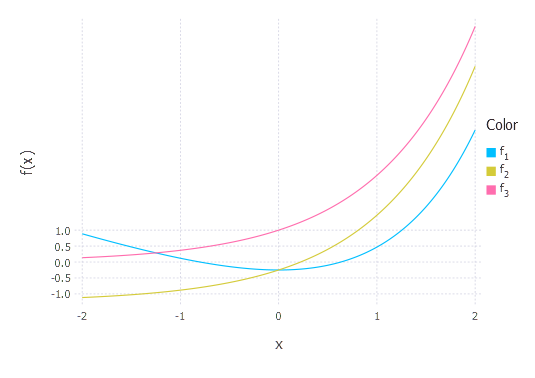

In [22]:
# Primjer 4.2
f(x)=exp(x)-x-5.0/4
φ(x)=exp(x)-5.0/4
plot([f,φ,x->ForwardDiff.derivative(φ,x)],-2.0,2.0,Guide.yticks(ticks=[-1.0,-0.5,0.0,0.5,1.0]))

Iz oblika 

$$
x=φ(x)=\exp(x)-\frac{5}{4}
$$

možemo izračunati samo negativnu nul-točku, jer je u okolini pozitivne nul-točke $|\varphi'(x)|>1$.
Za $x_0=1.0$ niz divergira vrlo brzo, a za $x_0=0.6$, što je blizu pozitivne nul-točke, 
niz konvergira prema negativnoj nul-točki, i to bez teoretskog obrazloženja.

Pozitivnu nul-točku možemo izračunati iz drukčijeg prikaza:

$$
x=\ln\big(x+\frac{5}{4}\big)
$$

In [18]:
myiteration(φ,0.5,1e-5)

(-0.8012112982162594,18)

In [19]:
myiteration(φ,1.0,1e-5), myiteration(φ,0.6,1e-5)

((Inf,5),(-0.8012141386307698,21))

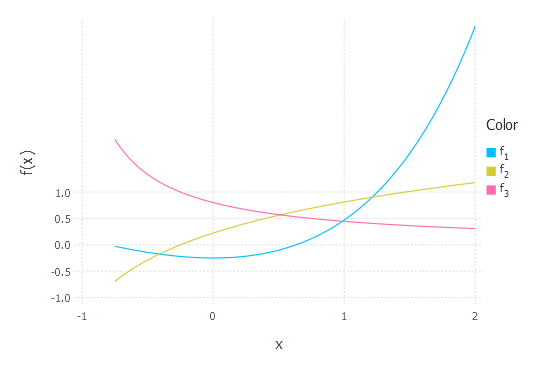

In [23]:
φ1(x)=log(x+5.0/4)
plot([f,φ1,x->ForwardDiff.derivative(φ1,x)],-5.0/4+0.5,2.0,Guide.yticks(ticks=[-1.0,-0.5,0.0,0.5,1.0]))

In [24]:
myiteration(φ1,1.0,1e-5), myiteration(φ1,0.6,1e-5)

((0.6327212541364527, 16), (0.6327058260748064, 12))

### Primjer 4.7

Izračunajmo približno $\sqrt(2)$, odnosno izračunajmo pozitivno rješenje jednadžbe 

$$
x^2-2=0.
$$

Jednadžbu je moguće pretvoriti u oblik (2) kao 

$$
x=\frac{2}{x},
$$

no tada je $\varphi'(x)=-\frac{2}{x^2}$ pa na intervalu $[1,2]$ ne vrijedi (3). Zato stavimo

$$
\frac{x}{2}=\frac{1}{x},
$$

odnosno

$$
x=\frac{x}{2}+\frac{1}{x}=\frac{1}{2}(x+\frac{2}{x})\equiv\varphi(x).
$$

Točna vrijednost se postiže nakon samo 4 iteracije!

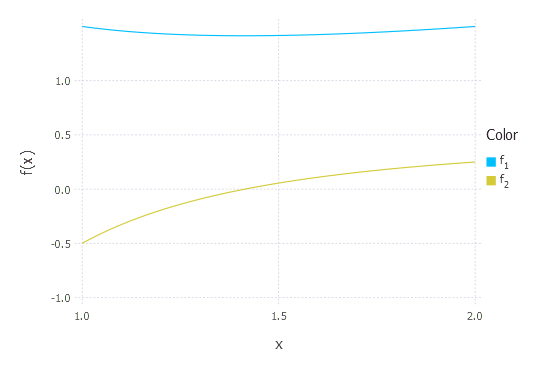

In [25]:
# Primjer 4.7
φ(x)=(x+2.0/x)/2.0
plot([φ,x->ForwardDiff.derivative(φ,x)],1.0,2.0,Guide.yticks(ticks=[-1.0,-0.5,0.0,0.5,1.0]))

In [23]:
myiteration(φ,1.0,1e-10), sqrt(2)

((1.414213562373095,4),1.4142135623730951)

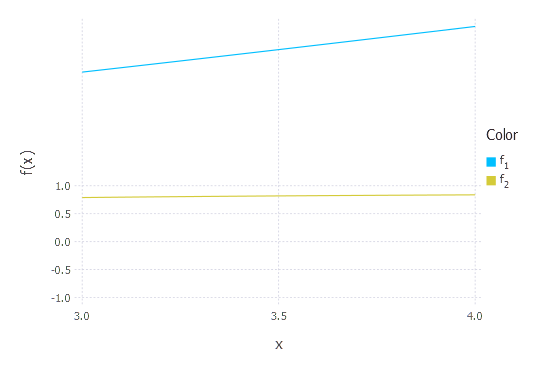

In [26]:
# Probajmo i sqrt(10)
φ(x)=(9x+10.0/x)/10.0
plot([φ,x->ForwardDiff.derivative(φ,x)],3.0,4.0,Guide.yticks(ticks=[-1.0,-0.5,0.0,0.5,1.0]))

In [25]:
myiteration(φ,3.0,1e-10), sqrt(10)

((3.1622776597958935,88),3.1622776601683795)

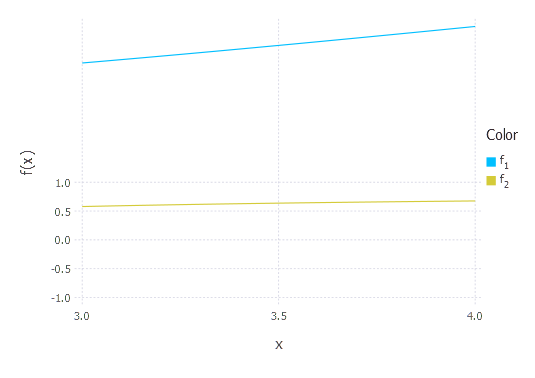

In [27]:
# Probajmo i sqrt(10)
φ(x)=(4x+10.0/x)/5.0
plot([φ,x->ForwardDiff.derivative(φ,x)],3.0,4.0,Guide.yticks(ticks=[-1.0,-0.5,0.0,0.5,1.0]))

In [28]:
myiteration(φ,3.0,1e-10), sqrt(10)

((3.162277660043792, 40), 3.1622776601683795)

## Newtonova metoda

__Newtonova metoda__ ili __metoda tangente__ temelji se na sljedećoj ideji: zadanu funkciju $f(x)$ u okolini zadane početne aproksimacije $x_0$ aproksimiramo tangentom kroz točku $(x_0,f(x_0))$,

$$
f_1(x)=f(x_0)+f'(x_0)(x-x_0),
$$

te za sljedeću aproksimaciju uzmemo sjecište tangente s $x$-osi. Na taj dobijemo niz aproksimacija:

$$
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)},\quad n=0,1,2,\ldots  \tag{4}
$$

Vrijedi sljedeći

__Teorem__  Neka je $$f:[a,b]\to \mathbb{R}$$ i neka vrijedi:

* $f''$ je neprekidna na $(a,b)$,
* $f(a)\cdot f(b)<0$,
* $f'$ i $f''$ imaju stalan predznak na $(a,b)$, i 
* $f(x_0)\cdot f''(x_0)>0$ za odabranu početnu aproksimaciju $x_0\in [a,b]$.

Tada niz (4) konvergira prema __jedinstvenom__ rješenju $\xi$ jednadžbe $f(x)=0$ te vrijede __ocjene pogreške__

\begin{align*}
|\xi-x_n|&\leq \displaystyle\frac{M_2}{2m_1}(x_n-x_{n-1})^2, \\
|\xi-x_{n+1}|&\leq \displaystyle\frac{M_2}{2m_1}(\xi-x_{n})^2, \\
\end{align*}

gdje je 

$$
M_2=\max_{x\in(a,b)}|f''(x)|,\quad
m_1=\min_{x\in(a,b)}|f'(x)|.
$$

Dakle, konvergencija je __kvadratična__.

In [35]:
function myNewton{T}(f::Function,x::T,ϵ::T)
    ξ=x-f(x)/(x->ForwardDiff.derivative(f,x))(x)
    iter=0
    while abs(x-ξ)>ϵ && iter<100
        x=ξ
        ξ=x-f(x)/(x->ForwardDiff.derivative(f,x))(x)
        iter+=1
    end
    ξ,iter
end

myNewton (generic function with 1 method)

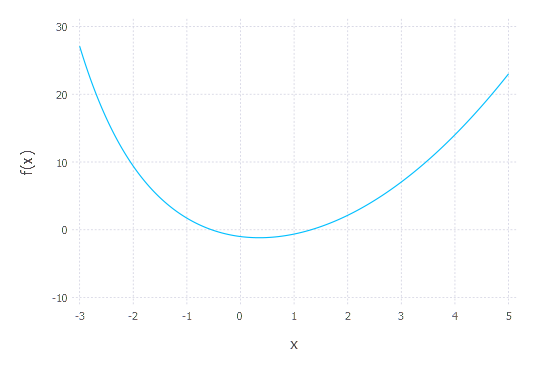

In [30]:
f(x)=exp(-x)+x^2-2
plot(f,-3,5)

Provjerimo uvjete teorema za pozitivnu nul-točku:

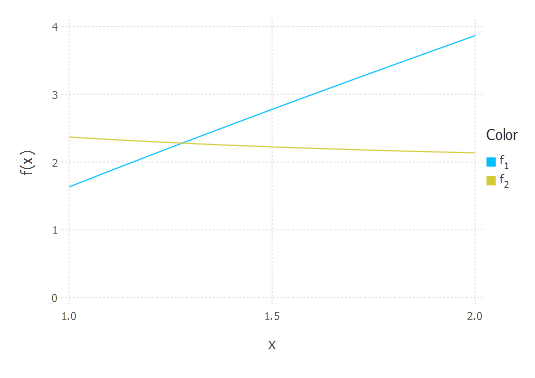

In [31]:
a=1
b=2
x0=2.0
plot([x->ForwardDiff.derivative(f,x),x->ForwardDiff.derivative(x->ForwardDiff.derivative(f,x),x)],a,b)

In [33]:
f(a)*f(b)<0, f(x0)*(x->ForwardDiff.derivative(x->ForwardDiff.derivative(f,x),x))(x0)>0

(true, true)

In [36]:
myNewton(f,x0,1e-10)

(1.3159737777962903, 5)

In [39]:
# Negativna nul-tocka
a=-1
b=0
x0=-1.0
f(a)*f(b)<0, f(x0)*(x->ForwardDiff.derivative(x->ForwardDiff.derivative(f,x),x))(x0)>0,myNewton(f,0.0,1e-10)

(true, true, (-0.5372744491738566, 6))

__Napomena__: ukoliko za početne aproksimacije odaberemo vrijednosti $x_0=1$, odnosno $x_0=0$, metoda će također konvergirati prema željenim nul-točkama, premda bez teoretskog obrazloženja: 

In [40]:
x0=1.0
f(x0)*(x->ForwardDiff.derivative(x->ForwardDiff.derivative(f,x),x))(x0)>0, myNewton(f,x0,1e-10)

(false, (1.31597377779629, 4))

In [42]:
x0=0.0
f(x0)*(x->ForwardDiff.derivative(x->ForwardDiff.derivative(f,x),x))(x0)>0, myNewton(f,x0,1e-10)

(false, (-0.5372744491738566, 6))

## Metoda sekante

Ukoliko u formuli (4) derivaciju $f'(x_n)$ aproksimiramo konačnom razlikom (sekantom) kroz __dvije__ prethodne točke,

$$
f'(x_n)\approx \frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}, 
$$

dobit ćemo niz

$$
x_{n+1}=\frac{x_{n-1}f(x_n)-x_nf(x_{n-1})}{f(x_n)-f(x_{n-1})},\qquad f(x_n)\neq f(x_{n-1}), \quad n=1,2,3,\ldots.
$$

Na početku trebamo odabrati __dvije__ početne aproksimacije, $x_0,x_1\in[a,b]$. Svojstva konvergencije su slična onima Newton-ove metodi.

In [43]:
function mysecant{T}(f::Function,x::T,ζ::T,ϵ::T)
    ξ=(x*f(ζ)-ζ*f(x))/(f(ζ)-f(x))
    iter=0
    while abs(ζ-ξ)>ϵ && iter<100
        x=ζ
        ζ=ξ
        ξ=(x*f(ζ)-ζ*f(x))/(f(ζ)-f(x))
        iter+=1
    end
    ξ,iter
end

mysecant (generic function with 1 method)

In [44]:
mysecant(f,-1.0,0.0,1e-10), mysecant(f,1.0,2.0,1e-10)

((-0.5372744491738566, 7), (1.3159737777962903, 6))